In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()

plt.rc('font', family=font_name)

In [2]:
sensor_data = pd.read_csv("./lp/data/sensors.csv")
sensor_data[:5]

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [3]:
grouped_by_sensor = sensor_data.groupby('sensor')
grouped_by_sensor

In [4]:
grouped_by_sensor.ngroups

2

In [5]:
grouped_by_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

In [6]:
def print_groups (group_object):
    
    for name, group in group_object:
        print (name)
        print (group[:5])

In [7]:
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [8]:
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [9]:
grouped_by_sensor.count()

,interval,axis,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [10]:
grouped_by_sensor.get_group('accel')[:5]

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [11]:
grouped_by_sensor.head(3)

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0


In [12]:
grouped_by_sensor.nth(1)#각 그룹에서 1번값을 가져옴

,interval,axis,reading
sensor,,,
accel,0,Y,0.5
orientation,0,Y,0.1


In [14]:
grouped_by_sensor.describe()

interval                                           reading  \
               count mean       std  min   25%  50%   75%  max   count   
sensor                                                                   
accel           12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   
orientation     12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   

                                                             
                 mean       std  min  25%   50%    75%  max  
sensor                                                       
accel        0.450000  0.328910  0.0  0.2  0.35  0.725  1.0  
orientation  0.133333  0.143548  0.0  0.0  0.10  0.225  0.4

In [15]:
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [16]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
            X            1      0.9
            Z            2      0.2
            Y            2      0.3
            X            2      0.8
            Z            3      0.3
            Y            3      0.2
            X            3      0.7
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
            X            1      0.1
            Z            2      0.0
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

In [17]:
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [18]:
print_groups(mi.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [19]:
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [20]:
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

,sensor,axis,interval,reading
0,accel,X,1.5,0.85
1,accel,Y,1.5,0.35
2,accel,Z,1.5,0.15
3,orientation,X,1.5,0.15
4,orientation,Y,1.5,0.25
5,orientation,Z,1.5,0.00


In [21]:
sensor_axis_grouping.mean()

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [29]:
sensor_axis_grouping.agg([np.sum, np.std, np.mean])

interval                reading                
                      sum       std mean     sum       std  mean
sensor      axis                                                
accel       X           6  1.290994  1.5     3.4  0.129099  0.85
            Y           6  1.290994  1.5     1.4  0.129099  0.35
            Z           6  1.290994  1.5     0.6  0.129099  0.15
orientation X           6  1.290994  1.5     0.6  0.129099  0.15
            Y           6  1.290994  1.5     1.0  0.129099  0.25
            Z           6  1.290994  1.5     0.0  0.000000  0.00

In [23]:
sensor_axis_grouping.agg({'interval' : len,'reading': np.mean})

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [24]:
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

In [25]:
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],'Values': [0, 1, 2, 3, 4],
                               'Values2': [5, 6, 7, 8, 9],'Other': ['foo', 'bar', 'baz','fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [30]:
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [51]:
grouped_by_label.transform(lambda x: x + 10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


In [52]:
df = pd.DataFrame({ 'Label': list("ABABAB"),'Values': [10, 20, 11, np.nan, 12, 22]})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [53]:
grouped.mean()

,Values
Label,
A,11.0
B,21.0


# transform() 그룹별적용이 가능

In [54]:
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


In [67]:
np.random.seed(123456)#0.5를 기준으로 표준편차2인 3년치 데이터
data = pd.Series(np.random.normal(0.5, 2, 365*3),pd.date_range('2013-01-01', periods=365*3))

In [66]:
periods = 100
rolling = data.rolling(window=periods,min_periods=periods,center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

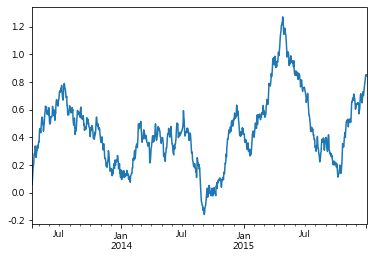

In [56]:
rolling.plot();

In [57]:
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


In [58]:
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,-3.172066e-17,1.0
2014,-1.881296e-15,1.0
2015,-1.492261e-15,1.0


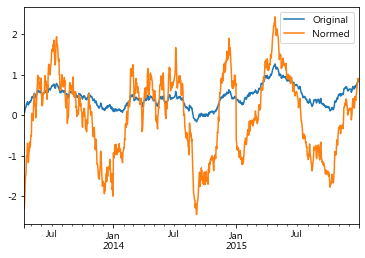

In [59]:
compared = pd.DataFrame({ 'Original': rolling,'Normed': normed })
compared.plot();

In [60]:
df = pd.DataFrame({'Label': list('AABCCC'),'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [68]:
#그룹의 값이 1개 이상인지
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [62]:
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


In [63]:
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0


# chapter 13